<a href="https://www.kaggle.com/code/akshayr009/earthquake?scriptVersionId=105668357" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  please upvote

**importing package wanted**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns

loading dataset (csv)

In [2]:
df=pd.read_csv('../input/earthquake-database/database.csv')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


showing the shape of dataframe 

In [3]:
df.shape

(23412, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

 finding the null values from the dateframe

In [5]:
df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

Removing coloums with most null values

In [6]:
df.drop(['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error','Horizontal Error','Root Mean Square'],axis=1,inplace=True)
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [7]:
df['Type'].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [8]:

df = df[df['Type']!='Rock Burst']
df = df[df['Type']!='Explosion']
df = df[df['Type']!='Nuclear Explosion']

In [9]:
df['Type'].value_counts()

Earthquake    23232
Name: Type, dtype: int64

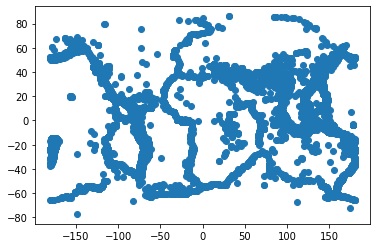

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x=df['Longitude'], y=df['Latitude'],)
plt.show()

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


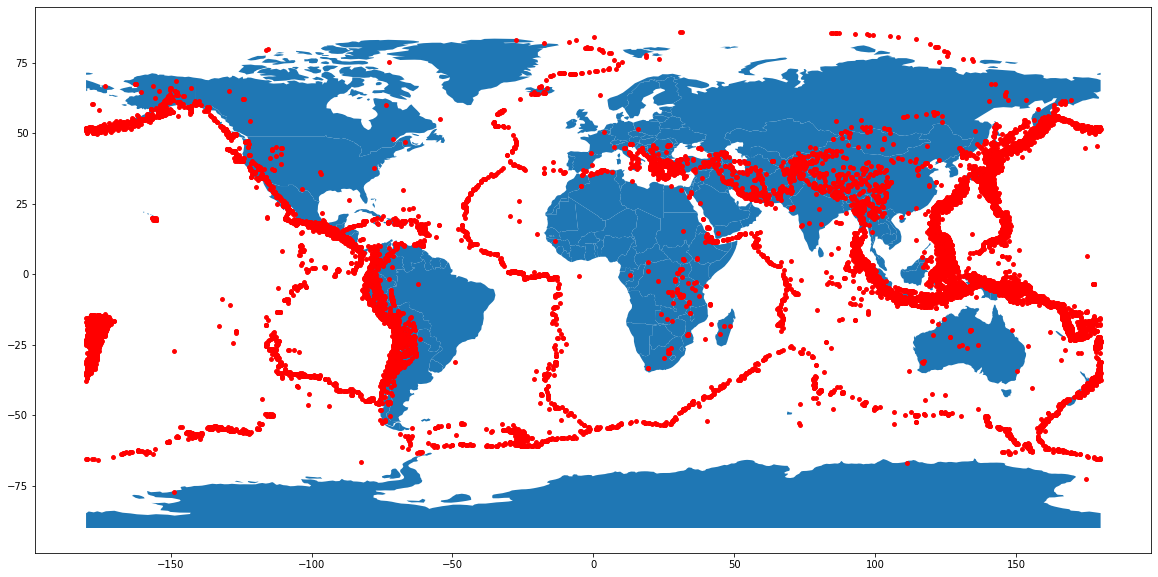

In [11]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 15)), marker='o', color='red', markersize=15);

In [12]:

import matplotlib.pyplot as plt
import plotly.express as px
fig=px.density_mapbox(df,lat='Latitude',lon='Longitude',radius=1,
                      center=dict(lat=0,lon=180),zoom=1.5,mapbox_style="stamen-terrain")
fig.show(figsize = (20,25))

In [13]:
df.drop(['Type','Location Source','Source','geometry','ID'],axis=1,inplace=True)

In [14]:
df['Magnitude Source'].value_counts()

US          10290
HRV          8223
ISCGEM       2580
GCMT         1489
NC            533
CI             49
AK             12
PAR             9
OFFICIAL        8
UW              6
GUC             6
NIED            4
NN              4
1000            3
US_GCMT         3
ATLAS           3
BRK             2
PGC             2
1023            1
1009            1
SE              1
US_PGC          1
1020            1
PR              1
Name: Magnitude Source, dtype: int64

In [15]:
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Magnitude Type,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,MW,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,MW,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,MW,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,MW,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,MW,ISCGEM,Automatic


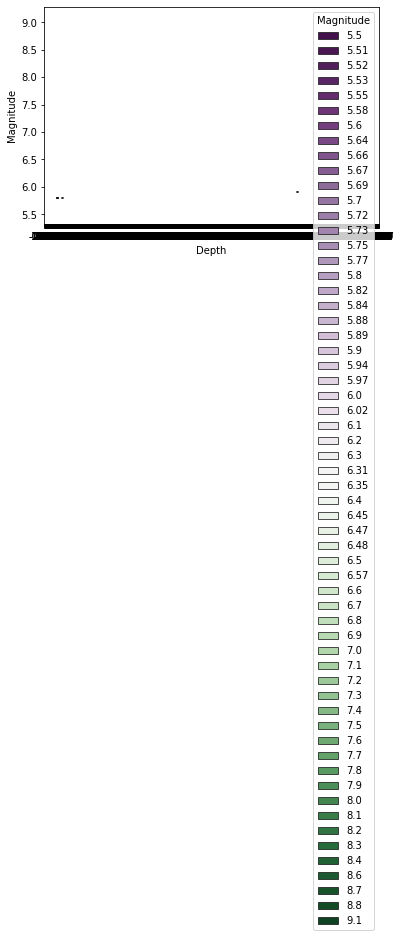

In [16]:
sns.boxplot(x="Depth", y="Magnitude", hue="Magnitude", data=df, palette="PRGn")
plt.show()